In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def norm_pdf(x, mu, sigma_squared) :
    return (1/np.sqrt(2*np.pi*sigma_squared))*np.exp(-0.5*(1/sigma_squared)*(x-mu)**2)

# Generate Data from a Gaussian

In [64]:
mu = 0.0
sigma_squared = 10.0
m = 6.0
s_squared = 15.0

<IPython.core.display.Javascript object>


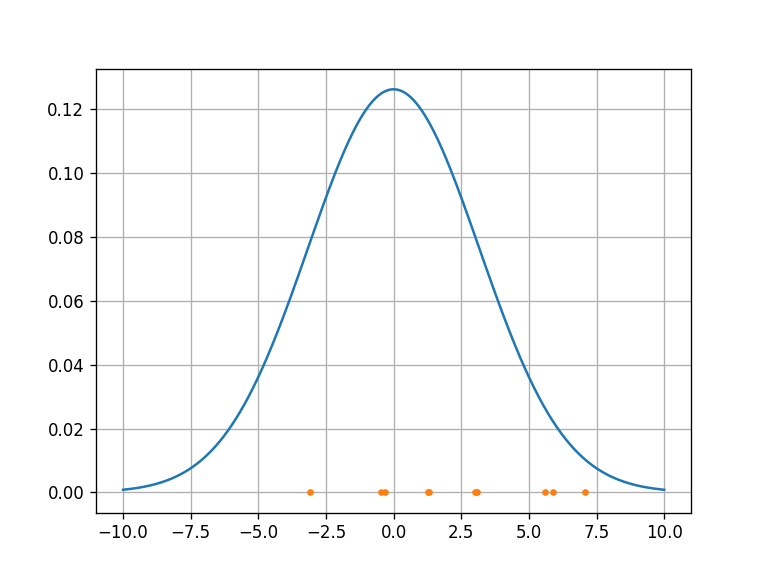

In [82]:
%matplotlib notebook

N = 10
x_ = np.linspace(-10,10,1000)
np.random.seed(0)
X = np.random.normal(loc=mu,scale=np.sqrt(sigma_squared),size=N)

plt.plot(x_, norm_pdf(x_, mu, sigma_squared))
plt.plot(X, np.zeros_like(X), '.')
plt.grid()
plt.show()

## Calculate MAP

In [81]:
mu_map = (s_squared*np.sum(X)+sigma_squared*m)/(s_squared*N+sigma_squared)
print('MAP estimate of mu = {}'.format(mu_map))

MAP estimate of mu = 2.562969548889776


## Calculate Posterior Predictive Variance

In [77]:
ppd_var = sigma_squared + (sigma_squared*s_squared/(sigma_squared+N*s_squared))
print('Posterior Variance using MAP estimate = {}'.format(sigma_squared))
print('Posterior Predictive Variance = {}'.format(ppd_var))

Posterior Variance using MAP estimate = 10.0
Posterior Predictive Variance = 10.9375


<IPython.core.display.Javascript object>


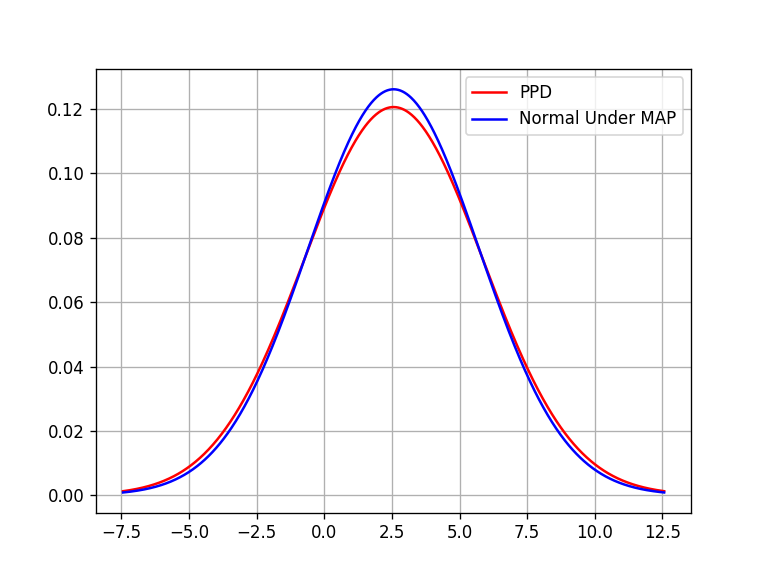

In [79]:
%matplotlib notebook
x_ = np.linspace(-10+mu_map,10+mu_map,1000)
map_ = norm_pdf(x_, mu_map, sigma_squared)
ppd_ = norm_pdf(x_, mu_map, ppd_var)
plt.plot(x_, ppd_, 'r')
plt.plot(x_, map_, 'b')
plt.legend(['PPD','Normal Under MAP'])
plt.grid()
plt.show()